# Class balancing study

## Common Parameters

In [68]:
sys.path.append("..") # Adds higher directory to python modules path.
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils import *
from helpers import *
from visuals import *
from data.data import *

import pandas as pd
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score
from visuals import plot_confusion_matrix
from tensorflow.keras import utils
from keras_numpy_backend import categorical_crossentropy

%load_ext autoreload
%autoreload 2
%matplotlib inline

data_folder = "../data/isic2019/sampled_balanced_82400_300"
model_folder = 'models'
history_folder = 'history'
pred_result_folder_val = 'val_predict_results'
pred_result_folder_test = 'test_predict_results'

model_name = 'DenseNet201'
postfix = 'best_balanced_acc'

models_info = read_models_info(history_folder, pred_result_folder_val, pred_result_folder_test)

# How to handle SVG fonts
plt.rcParams['svg.fonttype'] = 'none'

hyperparameter_str = formated_hyperparameter_str(6, 0.001, 0.00001, None, 0.3, 16, 20264, False)
baseline_model = {
    "log": os.path.join("..", history_folder, model_name, hyperparameter_str, "training.csv"),
    "hyperparameters": get_hyperparameters_from_str(hyperparameter_str), 
    "pred_folder": os.path.join("..", 'test_predict_results', model_name, hyperparameter_str, "no_unknown"),
    "data_folder": "../data/isic2019/sampled_original"
} 

hyperparameter_str = formated_hyperparameter_str(6, 0.001, 0.00001, None, 0.3, 16, 21000, True)
class_balanced_21000_model = {
    "log": os.path.join("..", history_folder, model_name, hyperparameter_str, "training.csv"),
    "hyperparameters": get_hyperparameters_from_str(hyperparameter_str), 
    "pred_folder": os.path.join("..", 'test_predict_results', model_name, hyperparameter_str, "no_unknown"),
    "data_folder": "../data/isic2019/sampled_balanced_21000"
} 

hyperparameter_str = formated_hyperparameter_str(6, 0.001, 0.00001, None, 0.3, 16, 21000, False)
class_unbalanced_21000_model = {
    "log": os.path.join("..", history_folder, model_name, hyperparameter_str, "training.csv"),
    "hyperparameters": get_hyperparameters_from_str(hyperparameter_str), 
    "pred_folder": os.path.join("..", 'test_predict_results', model_name, hyperparameter_str, "no_unknown"),
    "data_folder": "../data/isic2019/sampled_unbalanced_21000"
} 

hyperparameter_str = formated_hyperparameter_str(6, 0.001, 0.00001, None, 0.3, 16, 30000, True)
class_balanced_30000_model = {
    "log": os.path.join("..", history_folder, model_name, hyperparameter_str, "training.csv"),
    "hyperparameters": get_hyperparameters_from_str(hyperparameter_str), 
    "pred_folder": os.path.join("..", 'test_predict_results', model_name, hyperparameter_str, "no_unknown"),
    "data_folder": "../data/isic2019/sampled_balanced_30000"
} 

hyperparameter_str = formated_hyperparameter_str(6, 0.001, 0.00001, None, 0.3, 16, 30000, False)
class_unbalanced_30000_model = {
    "log": os.path.join("..", history_folder, model_name, hyperparameter_str, "training.csv"),
    "hyperparameters": get_hyperparameters_from_str(hyperparameter_str), 
    "pred_folder": os.path.join("..", 'test_predict_results', model_name, hyperparameter_str, "no_unknown"),
    "data_folder": "../data/isic2019/sampled_unbalanced_30000"
} 

hyperparameter_str = formated_hyperparameter_str(6, 0.001, 0.00001, None, 0.3, 16, 40000, True)
class_balanced_40000_model = {
    "log": os.path.join("..", history_folder, model_name, hyperparameter_str, "training.csv"),
    "hyperparameters": get_hyperparameters_from_str(hyperparameter_str), 
    "pred_folder": os.path.join("..", 'test_predict_results', model_name, hyperparameter_str, "no_unknown"),
    "data_folder": "../data/isic2019/sampled_balanced_40000"
} 

hyperparameter_str = formated_hyperparameter_str(6, 0.001, 0.00001, None, 0.3, 16, 40000, False)
class_unbalanced_40000_model = {
    "log": os.path.join("..", history_folder, model_name, hyperparameter_str, "training.csv"),
    "hyperparameters": get_hyperparameters_from_str(hyperparameter_str), 
    "pred_folder": os.path.join("..", 'test_predict_results', model_name, hyperparameter_str, "no_unknown"),
    "data_folder": "../data/isic2019/sampled_unbalanced_40000"
} 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# DenseNet201:
* Feature extract epochs: 6.
* Start learning rate: 0.001000
* Fine tuning learning rate: 0.000010
* Dropout rate: 0.300000
* Lambda(l2): None
* Batch size: 16

## Data Augmentation Methods:
* Random Rotations.
* Random Flips
* Random Shears
* Random Brightness variations
* Random Saturation variations

## Impact of the number of samples on validation accuracy (balanced datasets)

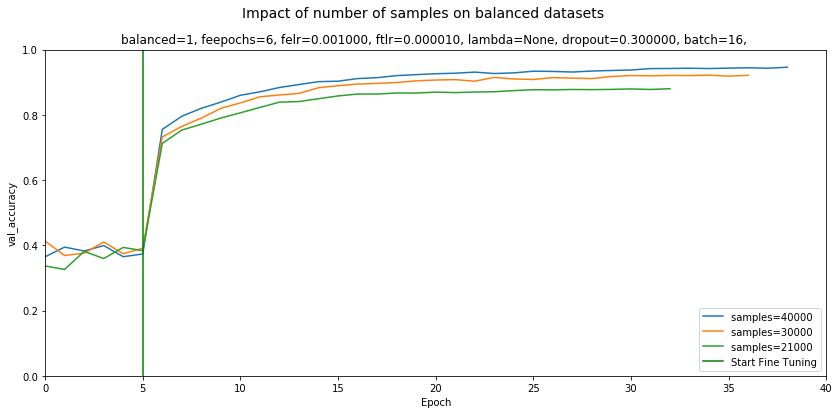

In [58]:
fig = plot_hyperparameter_comparisson_metric(
    [class_balanced_40000_model]+[class_balanced_30000_model]+[class_balanced_21000_model],
    "val_accuracy",
    0,
    1.0,
    hyperparameters_compared=["samples"],
    constant_parameters={
        "balanced": 1,
        "feepochs": 6, 
        "felr": 0.001,
        "ftlr": 0.00001,
        "dropout": 0.3, 
        "batch": 16,
        "lambda": None
    },
    title="Impact of number of samples on balanced datasets",
    feature_extract_epochs=6,
    epoch_max=40
)

## Compute test metrics for baseline (no oversampling or undersampling)

Training data has 20264 samples.


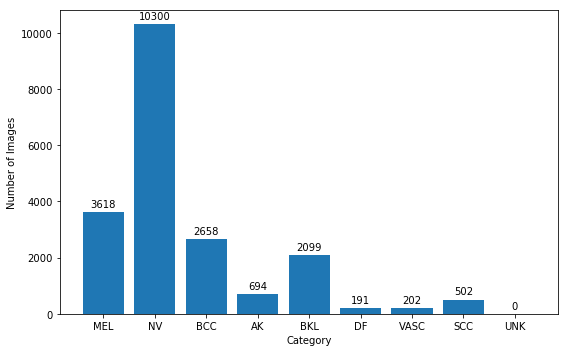

Test data has 5067 samples.


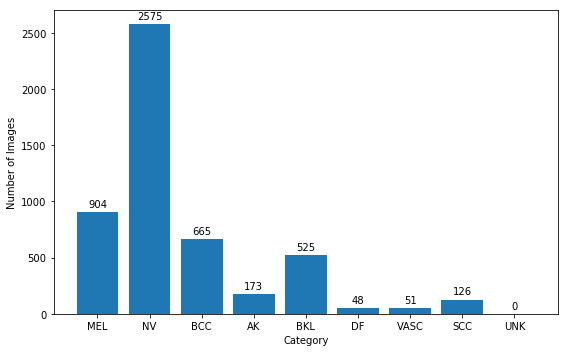

accuracy:  0.7975133214920072
balanced_accuracy_score:  0.6463479002366409
macro recall_score:  0.6463479002366409


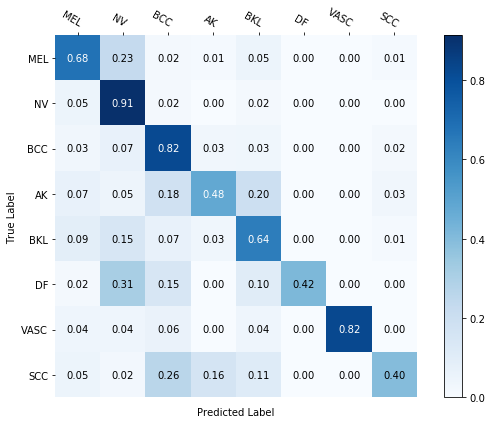

In [55]:
all_category_names, count_per_category, df_ground_truth = get_count_per_category(baseline_model["data_folder"])
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

all_category_names, count_per_category, df_ground_truth_test = get_count_per_category(baseline_model["data_folder"], test=True)
total_sample_count = sum(count_per_category.values())
print("Test data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

# Load predicted results
file_path = os.path.join(
    baseline_model["pred_folder"], 
    "{}.csv".format(postfix)
)

df_pred = pd.read_csv(file_path)
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

# Compute Balanced Accuracy
print('accuracy: ', accuracy_score(y_true, y_pred))
print('balanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
print('macro recall_score: ', recall_score(y_true, y_pred, average='macro'))
# Confusion Matrix
plot_confusion_matrix(
    y_true, 
    y_pred, 
    all_category_names, 
    normalize=True,
    figsize=(8, 6)
)
plt.show()

# 21000 training samples

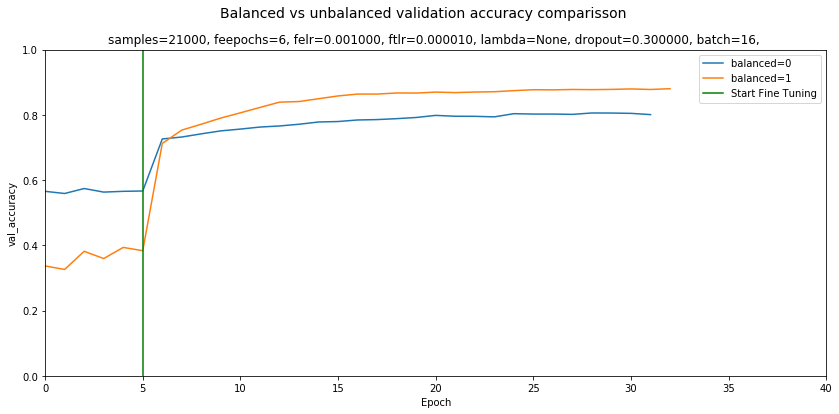

In [32]:
fig = plot_hyperparameter_comparisson_metric(
    [class_unbalanced_21000_model]+[class_balanced_21000_model],
    "val_accuracy",
    0,
    1.0,
    hyperparameters_compared=["balanced"],
    constant_parameters={
        "samples": 21000,
        "feepochs": 6, 
        "felr": 0.001,
        "ftlr": 0.00001,
        "dropout": 0.3, 
        "batch": 16,
        "lambda": None
    },
    title="Balanced vs unbalanced validation accuracy comparisson",
    feature_extract_epochs=6,
    epoch_max=40
)

## Compute test metrics for class unbalanced dataset (21000 training samples)

Training data has 20997 samples.


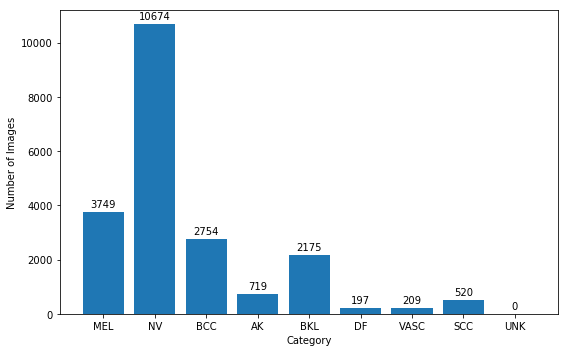

Test data has 5067 samples.


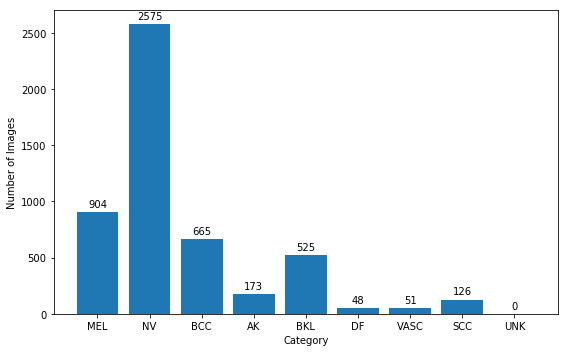

accuracy:  0.762589928057554
balanced_accuracy_score:  0.666018208421153
macro recall_score:  0.666018208421153


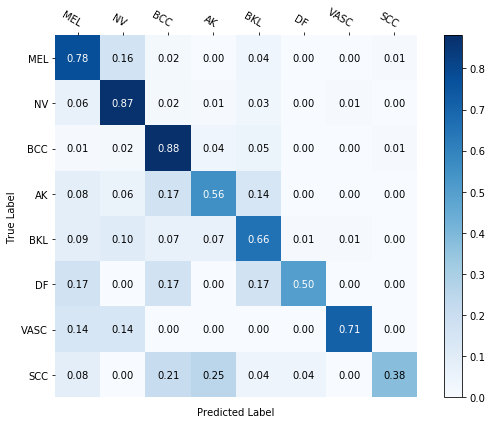

In [87]:
all_category_names, count_per_category = get_count_per_category(class_unbalanced_21000_model["data_folder"])
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

all_category_names, count_per_category = get_count_per_category(class_unbalanced_21000_model["data_folder"], test=True)
total_sample_count = sum(count_per_category.values())
print("Test data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

# Load predicted results
file_path = os.path.join(
    class_unbalanced_21000_model["pred_folder"], 
    "{}.csv".format(postfix)
)

df_pred = pd.read_csv(file_path)
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

# Compute Balanced Accuracy
print('accuracy: ', accuracy_score(y_true, y_pred))
print('balanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
print('macro recall_score: ', recall_score(y_true, y_pred, average='macro'))
# Confusion Matrix
plot_confusion_matrix(
    y_true, 
    y_pred, 
    all_category_names, 
    normalize=True,
    figsize=(8, 6)
)
plt.show()

## Compute test metrics for class balanced dataset (21000 training samples)

Training data has 21000 samples.


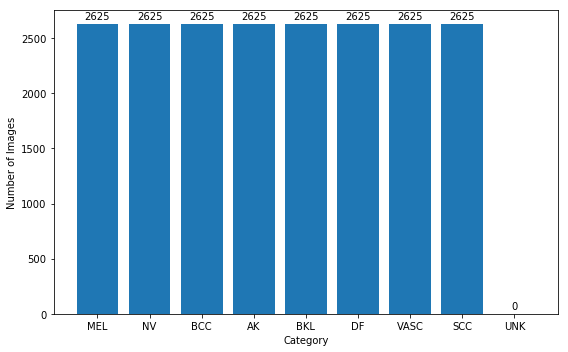

Test data has 5067 samples.


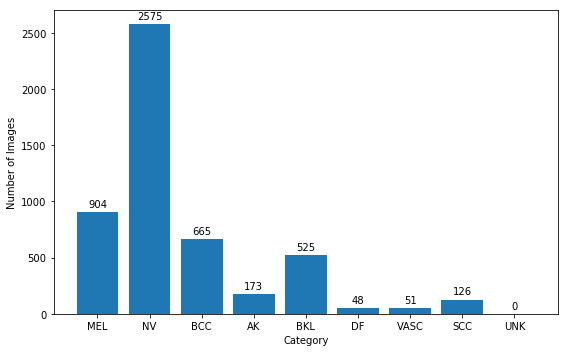

accuracy:  0.7519242155121374
balanced_accuracy_score:  0.7447264955391679
macro recall_score:  0.7447264955391679


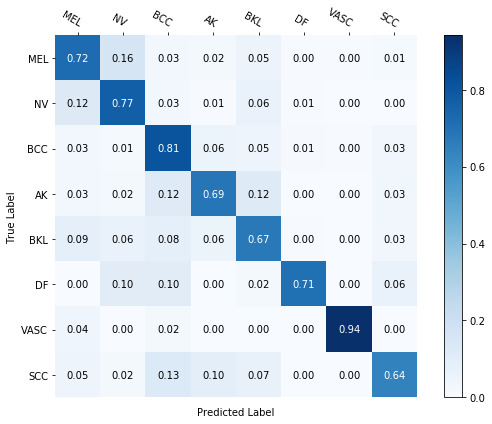

In [8]:
all_category_names, count_per_category, df_test_ground_truth = get_count_per_category(class_balanced_21000_model["data_folder"])
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

all_category_names, count_per_category, df_test_ground_truth = get_count_per_category(class_balanced_21000_model["data_folder"], test=True)
total_sample_count = sum(count_per_category.values())
print("Test data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

# Load predicted results
file_path = os.path.join(
    class_balanced_21000_model["pred_folder"], 
    "{}.csv".format(postfix)
)

df_pred = pd.read_csv(file_path)
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

# Compute Balanced Accuracy
print('accuracy: ', accuracy_score(y_true, y_pred))
print('balanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
print('macro recall_score: ', recall_score(y_true, y_pred, average='macro'))
# Confusion Matrix
plot_confusion_matrix(
    y_true, 
    y_pred, 
    all_category_names, 
    normalize=True,
    figsize=(8, 6)
)
plt.show()

# 30000 training samples

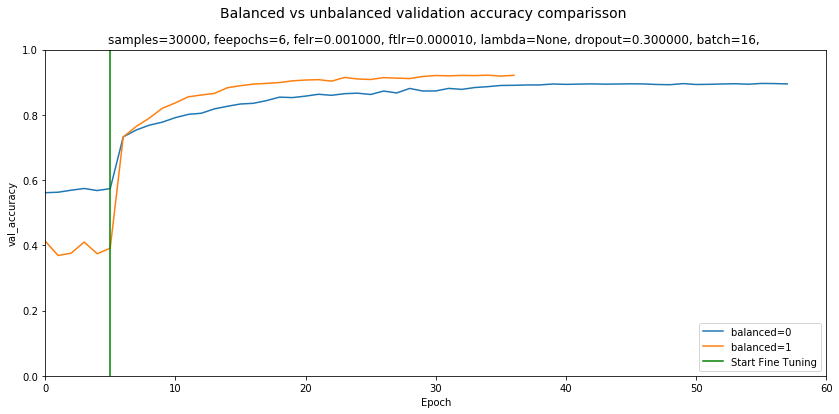

In [22]:
fig = plot_hyperparameter_comparisson_metric(
    [class_unbalanced_30000_model]+[class_balanced_30000_model],
    "val_accuracy",
    0,
    1.0,
    hyperparameters_compared=["balanced"],
    constant_parameters={
        "samples": 30000,
        "feepochs": 6, 
        "felr": 0.001,
        "ftlr": 0.00001,
        "dropout": 0.3, 
        "batch": 16,
        "lambda": None
    },
    title="Balanced vs unbalanced validation accuracy comparisson",
    feature_extract_epochs=6,
    epoch_max=60
)

## Test metrics for class unbalanced dataset 

Training data has 29997 samples.


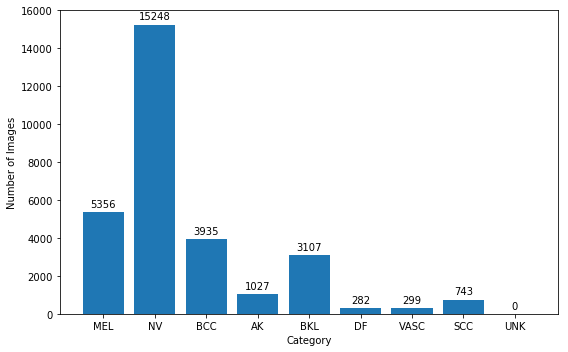

Test data has 5067 samples.


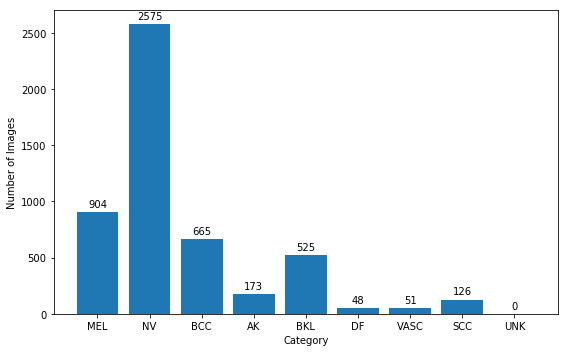

accuracy:  0.8221827511347938
balanced_accuracy_score:  0.6993335103540623
macro recall_score:  0.6993335103540623


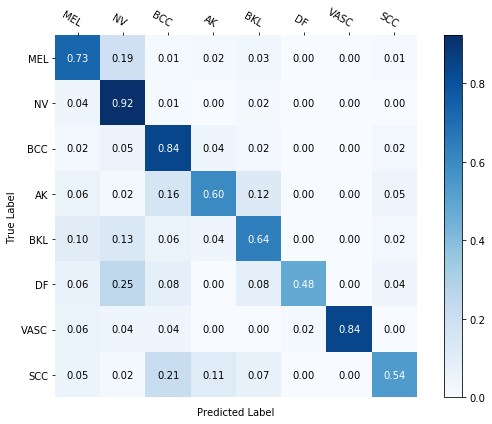

In [6]:
all_category_names, count_per_category, df_test_ground_truth = get_count_per_category(class_unbalanced_30000_model["data_folder"])
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

all_category_names, count_per_category, df_test_ground_truth = get_count_per_category(class_unbalanced_30000_model["data_folder"], test=True)
total_sample_count = sum(count_per_category.values())
print("Test data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

# Load predicted results
file_path = os.path.join(
    class_unbalanced_30000_model["pred_folder"], 
    "{}.csv".format(postfix)
)

df_pred = pd.read_csv(file_path)
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

# Compute Balanced Accuracy
print('accuracy: ', accuracy_score(y_true, y_pred))
print('balanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
print('macro recall_score: ', recall_score(y_true, y_pred, average='macro'))
# Confusion Matrix
plot_confusion_matrix(
    y_true, 
    y_pred, 
    all_category_names, 
    normalize=True,
    figsize=(8, 6)
)
plt.show()

## Test metrics for class balanced dataset 

Training data has 30000 samples.


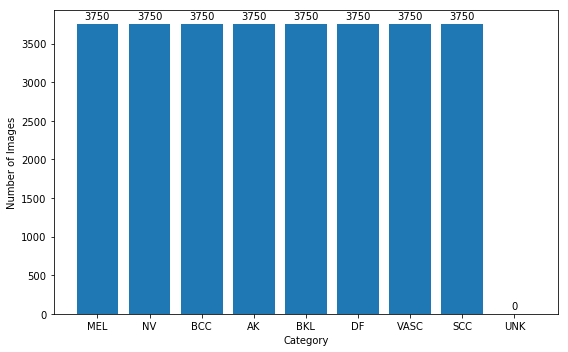

Test data has 5067 samples.


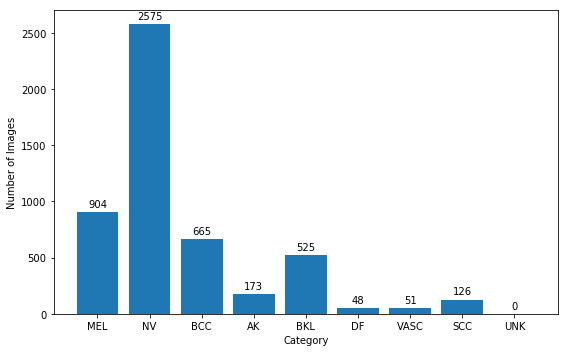

accuracy:  0.7795539767120584
balanced_accuracy_score:  0.7655637363246468
macro recall_score:  0.7655637363246468


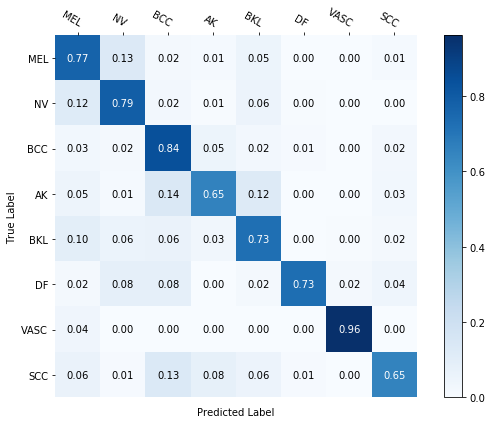

In [5]:
all_category_names, count_per_category, df_test_ground_truth = get_count_per_category(class_balanced_30000_model["data_folder"])
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

all_category_names, count_per_category, df_test_ground_truth = get_count_per_category(class_balanced_30000_model["data_folder"], test=True)
total_sample_count = sum(count_per_category.values())
print("Test data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

# Load predicted results
file_path = os.path.join(
    class_balanced_30000_model["pred_folder"], 
    "{}.csv".format(postfix)
)

df_pred = pd.read_csv(file_path)
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

# Compute Balanced Accuracy
print('accuracy: ', accuracy_score(y_true, y_pred))
print('balanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
print('macro recall_score: ', recall_score(y_true, y_pred, average='macro'))
# Confusion Matrix
plot_confusion_matrix(
    y_true, 
    y_pred, 
    all_category_names, 
    normalize=True,
    figsize=(8, 6)
)
plt.show()

# 40000 Balanced Samples

Training data has 40000 samples.


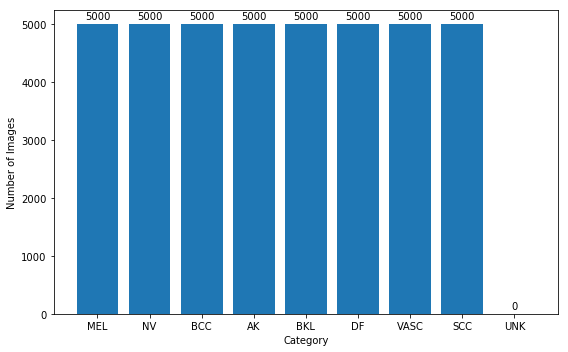

Test data has 5067 samples.


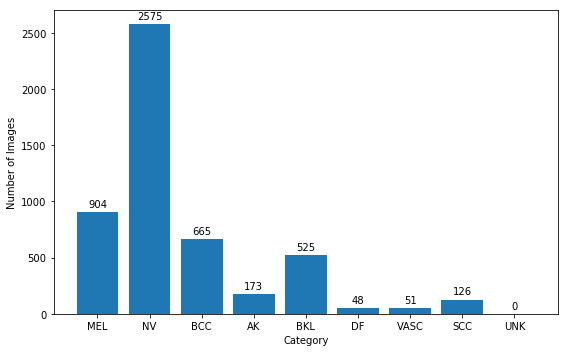

accuracy:  0.8026445628577067
balanced_accuracy_score:  0.7849143504154792
macro recall_score:  0.7849143504154792


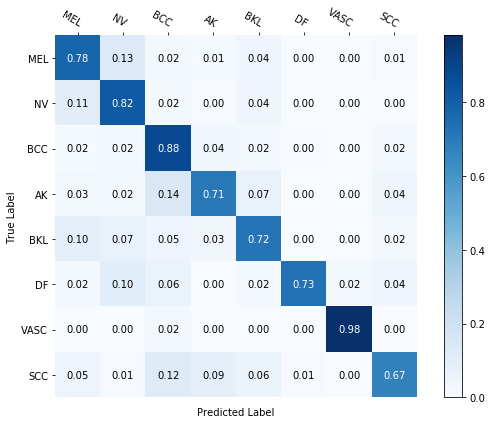

In [44]:
all_category_names, count_per_category, df_test_ground_truth = get_count_per_category(class_balanced_40000_model["data_folder"])
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

all_category_names, count_per_category, df_test_ground_truth = get_count_per_category(class_balanced_40000_model["data_folder"], test=True)
total_sample_count = sum(count_per_category.values())
print("Test data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

# Load predicted results
file_path = os.path.join(
    class_balanced_40000_model["pred_folder"], 
    "{}.csv".format(postfix)
)

df_pred = pd.read_csv(file_path)
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

# Compute Balanced Accuracy
print('accuracy: ', accuracy_score(y_true, y_pred))
print('balanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
print('macro recall_score: ', recall_score(y_true, y_pred, average='macro'))
# Confusion Matrix
plot_confusion_matrix(
    y_true, 
    y_pred, 
    all_category_names, 
    normalize=True,
    figsize=(8, 6)
)
plt.show()

# 82400 Balanced Samples

In [ ]:
all_category_names, count_per_category, df_test_ground_truth = get_count_per_category(class_balanced_82400_model["data_folder"])
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

all_category_names, count_per_category, df_test_ground_truth = get_count_per_category(class_balanced_82400_model["data_folder"], test=True)
total_sample_count = sum(count_per_category.values())
print("Test data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

# Load predicted results
file_path = os.path.join(
    class_balanced_82400_model["pred_folder"], 
    "{}.csv".format(postfix)
)

df_pred = pd.read_csv(file_path)
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

# Compute Balanced Accuracy
print('accuracy: ', accuracy_score(y_true, y_pred))
print('balanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
print('macro recall_score: ', recall_score(y_true, y_pred, average='macro'))
# Confusion Matrix
plot_confusion_matrix(
    y_true, 
    y_pred, 
    all_category_names, 
    normalize=True,
    figsize=(8, 6)
)
plt.show()

# Samples impact on validation performance 

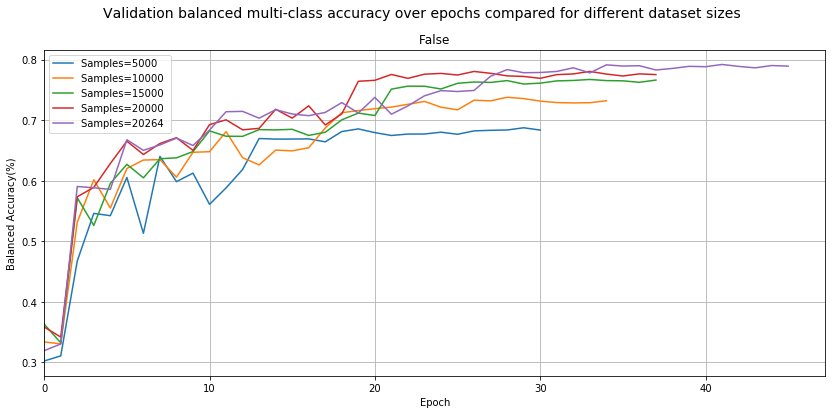

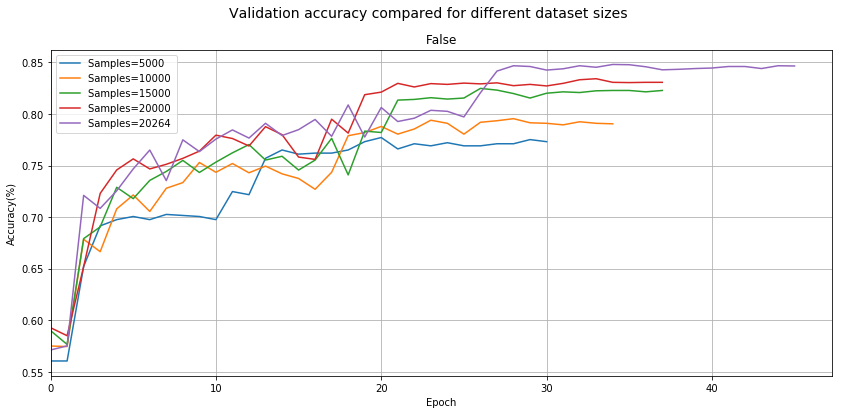

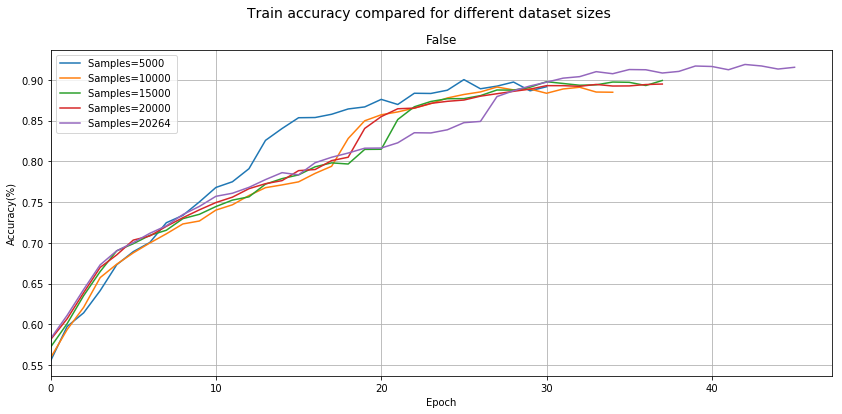

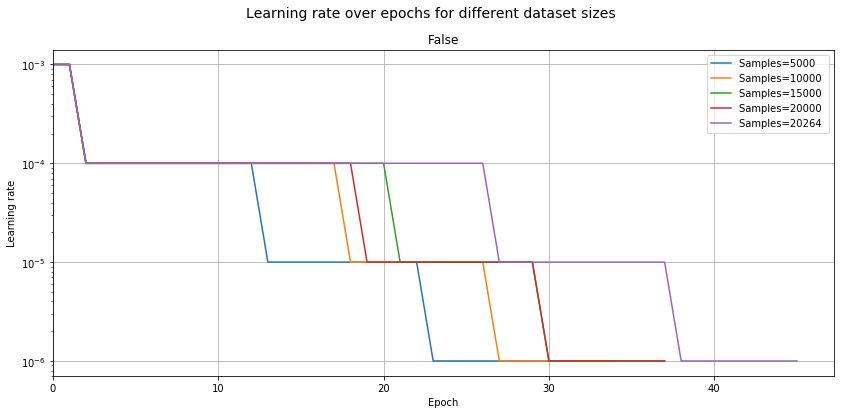

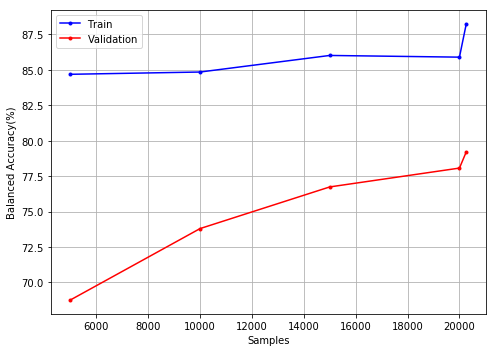

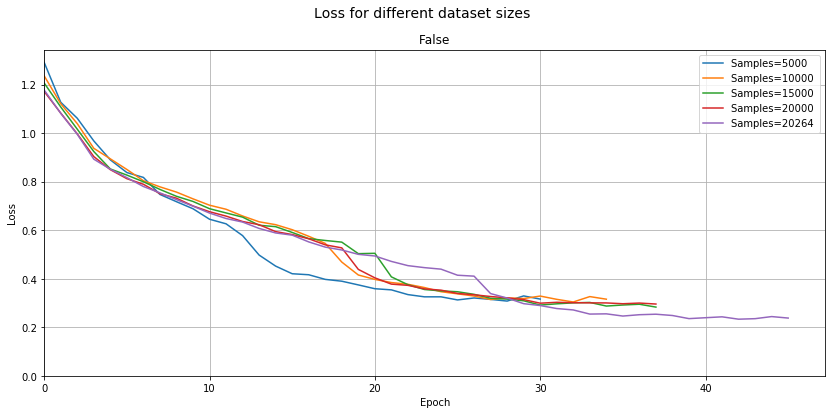

In [36]:
constant_params={
    "balanced": 0,
    "dropout": None, 
    "lambda": None,
    "felr": 0.001, 
    "ftlr": 0.0001, 
    "feepochs": 2,
    "batch": 16
}

fig1 = plot_hyperparameter_over_epochs(
    models_info,
    "val_balanced_accuracy",
    "Balanced Accuracy(%)",
    hyperparameter_compared="samples",
    hyperparameter_compared_label="Samples",
    constant_parameters=constant_params,
    title="Validation balanced multi-class accuracy over epochs compared for different dataset sizes",
    feature_extract_epochs=None,
)

fig2 = plot_hyperparameter_over_epochs(
    models_info,
    "val_accuracy",
    "Accuracy(%)",
    hyperparameter_compared="samples",
    hyperparameter_compared_label="Samples",
    constant_parameters=constant_params,
    title="Validation accuracy compared for different dataset sizes",
    feature_extract_epochs=None,
)


fig3 = plot_hyperparameter_over_epochs(
    models_info,
    "accuracy",
    "Accuracy(%)",
    hyperparameter_compared="samples",
    hyperparameter_compared_label="Samples",
    constant_parameters=constant_params,
    title="Train accuracy compared for different dataset sizes",
    feature_extract_epochs=None,
)

fig4 = plot_hyperparameter_over_epochs(
    models_info,
    "lr",
    "Learning rate",
    hyperparameter_compared="samples",
    hyperparameter_compared_label="Samples",
    constant_parameters=constant_params,
    title="Learning rate over epochs for different dataset sizes",
    feature_extract_epochs=None,
    y_scale="log"
)

fig5 = plot_hyperparameter_comparisson(
    filter_models_info(
        models_info, 
        models=["DenseNet201"],
        parameters=constant_params
    ),
    "samples",
    parameter_label="Samples",
    train_metric="balanced_accuracy",
    val_metric="val_balanced_accuracy",
)

fig6 = plot_hyperparameter_over_epochs(
    models_info,
    "loss",
    "Loss",
    hyperparameter_compared="samples",
    hyperparameter_compared_label="Samples",
    constant_parameters=constant_params,
    title="Loss for different dataset sizes",
    feature_extract_epochs=None,
    y_min=0,
)

fig1.savefig(os.path.join("densenet201_samples_bma_over_epochs.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)
fig4.savefig(os.path.join("densenet201_samples_lr_over_epochs.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)
fig5.savefig(os.path.join("densenet201_samples_comp.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)

## Balance influence study 

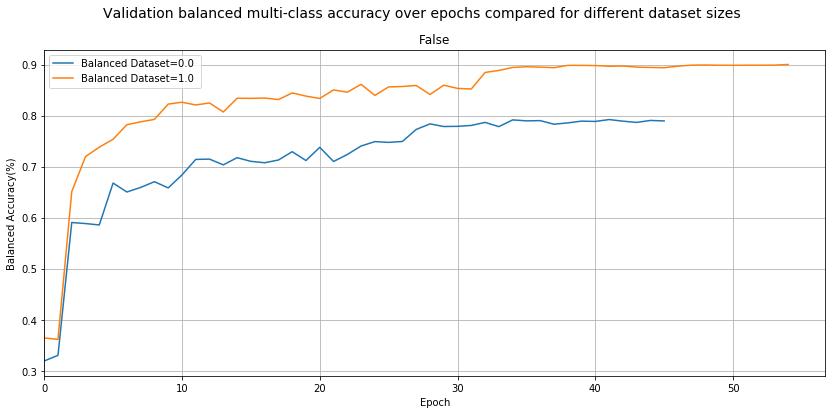

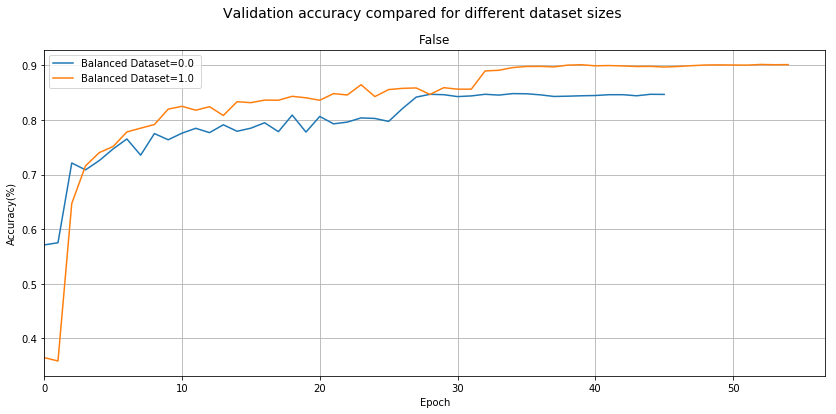

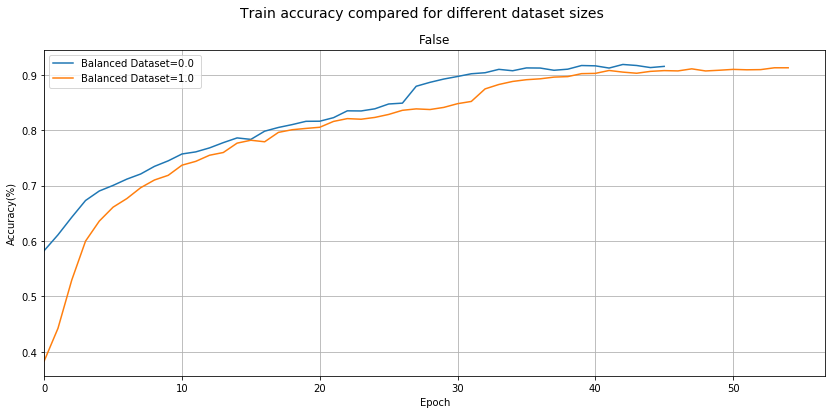

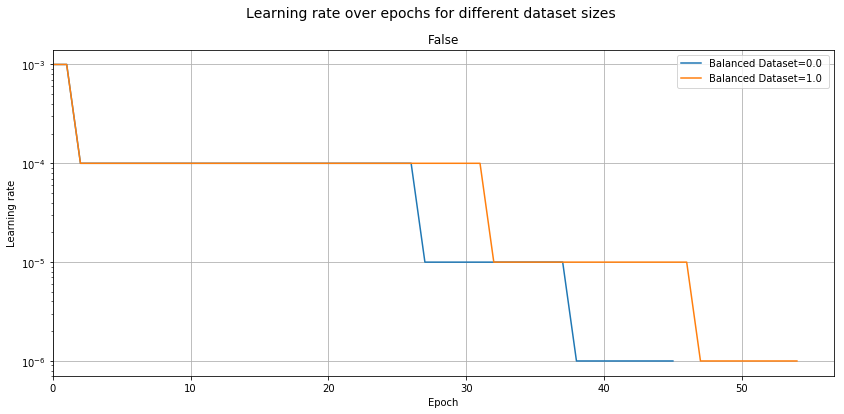

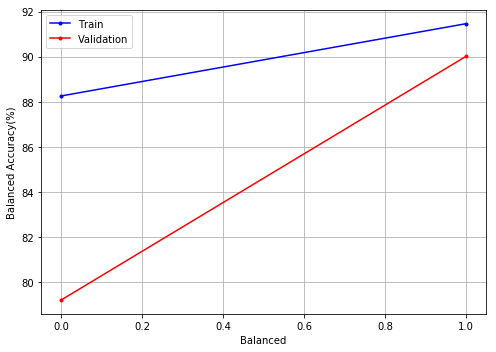

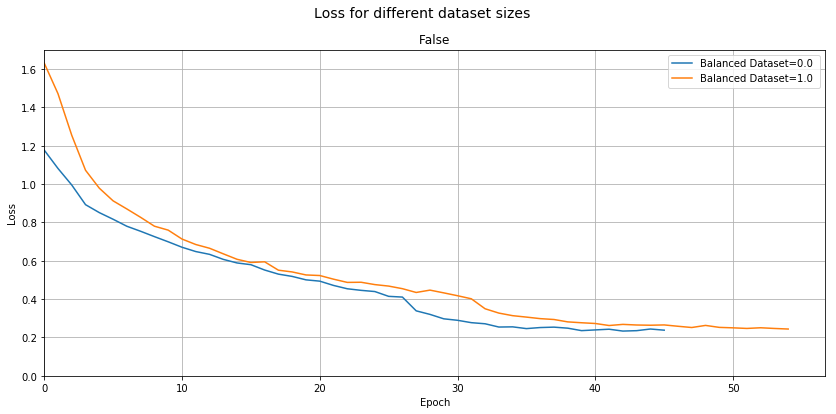

In [60]:
constant_params={
    "samples": 20264,
    "dropout": None, 
    "lambda": None,
    "felr": 0.001, 
    "ftlr": 0.0001, 
    "feepochs": 2,
    "batch": 16
}

fig1 = plot_hyperparameter_over_epochs(
    models_info,
    "val_balanced_accuracy",
    "Balanced Accuracy(%)",
    hyperparameter_compared="balanced",
    hyperparameter_compared_label="Balanced Dataset",
    constant_parameters=constant_params,
    title="Validation balanced multi-class accuracy over epochs compared for different dataset sizes",
    feature_extract_epochs=None,
)

fig2 = plot_hyperparameter_over_epochs(
    models_info,
    "val_accuracy",
    "Accuracy(%)",
    hyperparameter_compared="balanced",
    hyperparameter_compared_label="Balanced Dataset",
    constant_parameters=constant_params,
    title="Validation accuracy compared for different dataset sizes",
    feature_extract_epochs=None,
)


fig3 = plot_hyperparameter_over_epochs(
    models_info,
    "accuracy",
    "Accuracy(%)",
    hyperparameter_compared="balanced",
    hyperparameter_compared_label="Balanced Dataset",
    constant_parameters=constant_params,
    title="Train accuracy compared for different dataset sizes",
    feature_extract_epochs=None,
)

fig4 = plot_hyperparameter_over_epochs(
    models_info,
    "lr",
    "Learning rate",
    hyperparameter_compared="balanced",
    hyperparameter_compared_label="Balanced Dataset",
    constant_parameters=constant_params,
    title="Learning rate over epochs for different dataset sizes",
    feature_extract_epochs=None,
    y_scale="log"
)

fig5 = plot_hyperparameter_comparisson(
    filter_models_info(
        models_info, 
        models=["DenseNet201"],
        parameters=constant_params
    ),
    "balanced",
    parameter_label="Balanced",
    train_metric="balanced_accuracy",
    val_metric="val_balanced_accuracy",
)

fig6 = plot_hyperparameter_over_epochs(
    models_info,
    "loss",
    "Loss",
    hyperparameter_compared="balanced",
    hyperparameter_compared_label="Balanced Dataset",
    constant_parameters=constant_params,
    title="Loss for different dataset sizes",
    feature_extract_epochs=None,
    y_min=0,
)

fig1.savefig(os.path.join("densenet201_balanced_bma_over_epochs.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)
fig5.savefig(os.path.join("densenet201_balanced_comp.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)

## Class balanced study

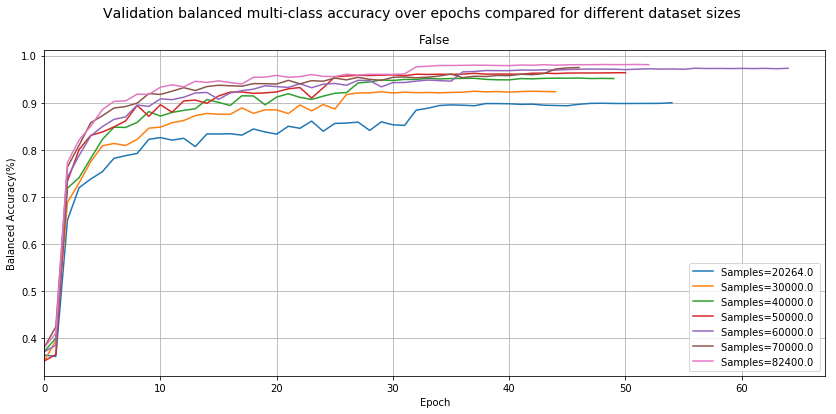

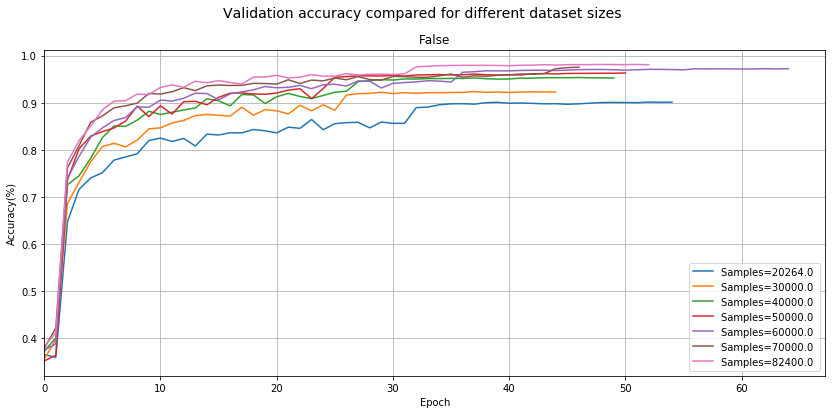

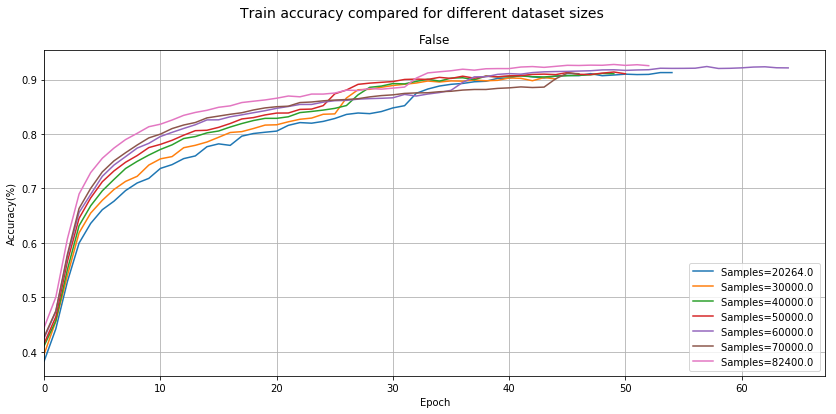

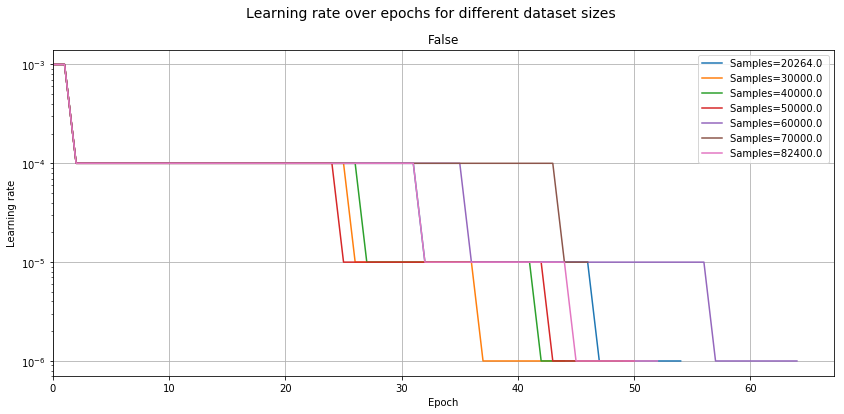

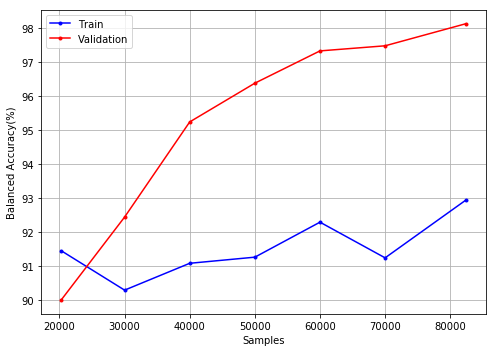

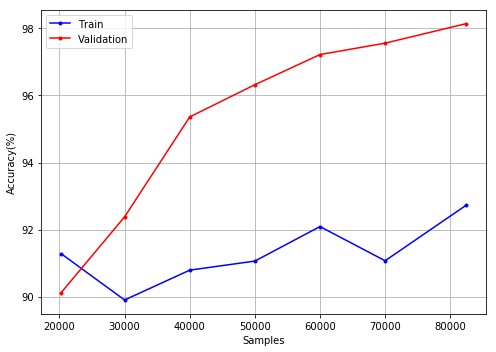

In [74]:
constant_params={
    "balanced": 1,
    "dropout": None, 
    "lambda": None,
    "felr": 0.001, 
    "ftlr": 0.0001, 
    "feepochs": 2,
    "batch": 16
}

fig1 = plot_hyperparameter_over_epochs(
    models_info,
    "val_balanced_accuracy",
    "Balanced Accuracy(%)",
    hyperparameter_compared="samples",
    hyperparameter_compared_label="Samples",
    constant_parameters=constant_params,
    title="Validation balanced multi-class accuracy over epochs compared for different dataset sizes",
    feature_extract_epochs=None,
)

fig2 = plot_hyperparameter_over_epochs(
    models_info,
    "val_accuracy",
    "Accuracy(%)",
    hyperparameter_compared="samples",
    hyperparameter_compared_label="Samples",
    constant_parameters=constant_params,
    title="Validation accuracy compared for different dataset sizes",
    feature_extract_epochs=None,
)


fig3 = plot_hyperparameter_over_epochs(
    models_info,
    "accuracy",
    "Accuracy(%)",
    hyperparameter_compared="samples",
    hyperparameter_compared_label="Samples",
    constant_parameters=constant_params,
    title="Train accuracy compared for different dataset sizes",
    feature_extract_epochs=None,
)

fig4 = plot_hyperparameter_over_epochs(
    models_info,
    "lr",
    "Learning rate",
    hyperparameter_compared="samples",
    hyperparameter_compared_label="Samples",
    constant_parameters=constant_params,
    title="Learning rate over epochs for different dataset sizes",
    feature_extract_epochs=None,
    y_scale="log"
)

fig5 = plot_hyperparameter_comparisson(
    filter_models_info(
        models_info, 
        models=["DenseNet201"],
        parameters=constant_params
    ),
    "samples",
    parameter_label="Samples",
    train_metric="balanced_accuracy",
    val_metric="val_balanced_accuracy",
)

fig6 = plot_hyperparameter_comparisson(
    filter_models_info(
        models_info, 
        models=["DenseNet201"],
        parameters=constant_params
    ),
    "samples",
    parameter_label="Samples",
    train_metric="accuracy",
    val_metric="val_accuracy",
    metric_label="Accuracy(%)"
)

fig5.savefig(os.path.join("densenet201_balanced_samples_bma_comp.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)


## Test set results 

Test data has 5067 samples.
'MEL':	904	(17.84%)
'NV':	2575	(50.82%)
'BCC':	665	(13.12%)
'AK':	173	(3.41%)
'BKL':	525	(10.36%)
'DF':	48	(0.95%)
'VASC':	51	(1.01%)
'SCC':	126	(2.49%)
'UNK':	0	(0.00%)


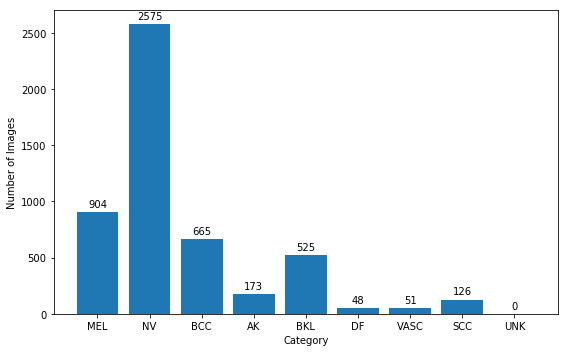

Model selection criteria: best_balanced_acc

Train + validation sampled: 82400
Feature extract epochs: 2
Feature extract learning rate: 0.001000
Fine tuning learning rate: 0.000100
Dropout rate: None
Batch size: 16

Samples: 20264 (unbalanced)
	accuracy:  0.5510163805012828
	balanced_accuracy_score:  0.3326417429412836
Samples: 20264 (balanced)
	accuracy:  0.7781724886520623
	balanced_accuracy_score:  0.7791267145192107
Samples: 82400 (balanced)
	accuracy:  0.8614564831261101
	balanced_accuracy_score:  0.8094238985679412


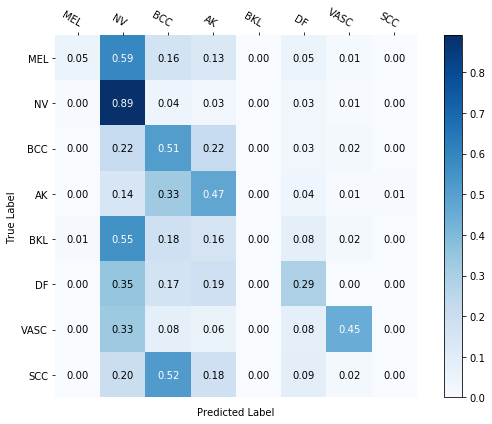

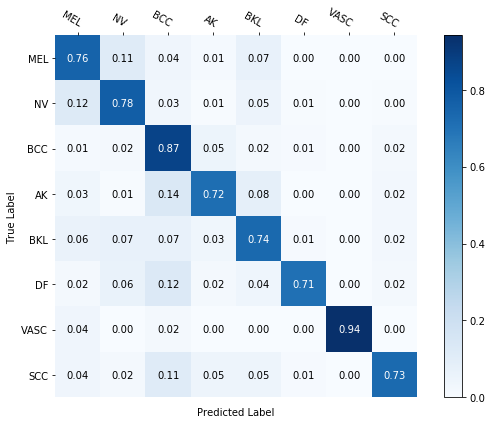

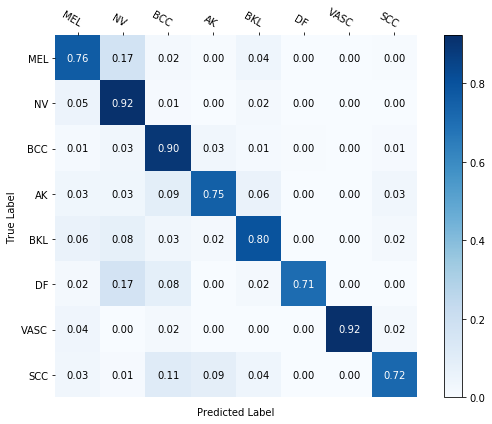

In [71]:
test_image_folder = os.path.join(data_folder, 'ISIC_2019_Test_Input')
test_ground_truth_file = os.path.join(data_folder, 'ISIC_2019_Test_GroundTruth.csv')
df_test_ground_truth, known_category_names, unknown_category_name = load_isic_training_data(
    test_image_folder, 
    test_ground_truth_file,
    test=True
)

known_category_num = len(known_category_names)
unknown_category_num = 1
all_category_names = known_category_names + [unknown_category_name]
all_category_num = known_category_num + unknown_category_num

count_per_category = Counter(df_test_ground_truth['category'])
total_sample_count = sum(count_per_category.values())
print("Test data has {} samples.".format(total_sample_count))
for i, c in enumerate(all_category_names):
    print("'%s':\t%d\t(%.2f%%)" % (c, count_per_category[i], count_per_category[i]*100/total_sample_count))

# Create a bar chart
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor('white')
ax.set(xlabel='Category', ylabel='Number of Images')
rects = plt.bar(all_category_names, [count_per_category[i] for i in range(all_category_num)])
autolabel(ax, rects)
fig.tight_layout()
plt.show()

model_name = 'DenseNet201'
postfix = 'best_balanced_acc'

print(f'Model selection criteria: {postfix}\n')
print(f"Train + validation sampled: {model_info['hyperparameters']['samples']}")
print(f"Feature extract epochs: {model_info['hyperparameters']['feepochs']}")
print(f"Feature extract learning rate: {model_info['hyperparameters']['felr']}")
print(f"Fine tuning learning rate: {model_info['hyperparameters']['ftlr']}")
print(f"Dropout rate: {model_info['hyperparameters']['dropout']}")
print(f"Batch size: {model_info['hyperparameters']['batch']}")

print("")

# Confusion Matrixes 

# 20264 samples imbalanced
model_info = filter_models_info(
    models_info, 
    models=[model_name],
    parameters={
        "samples": 20264,
        "balanced": 0,
        "lambda": None,
        "feepochs": 2, 
        "felr": 0.001, 
        "ftlr": 0.0001, 
        "batch": 16,
        "dropout": None
    }
)[0]

# Load predicted results
df_pred = pd.read_csv(os.path.join(model_info["pred_test"], "no_unknown", f"{postfix}.csv"))
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

print('Samples: 20264 (unbalanced)')
print('\taccuracy: ', accuracy_score(y_true, y_pred))
print('\tbalanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
fig3 = plot_confusion_matrix(
    y_true, 
    y_pred, 
    known_category_names, 
    normalize=True,
    figsize=(8, 6)
)

# 20264 samples balanced
model_info = filter_models_info(
    models_info, 
    models=[model_name],
    parameters={
        "samples": 20264,
        "balanced": 1,
        "lambda": None,
        "feepochs": 2, 
        "felr": 0.001, 
        "ftlr": 0.0001, 
        "batch": 16,
        "dropout": None
    }
)[0]

# Load predicted results
df_pred = pd.read_csv(os.path.join(model_info["pred_test"], "no_unknown", f"{postfix}.csv"))
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

print('Samples: 20264 (balanced)')
print('\taccuracy: ', accuracy_score(y_true, y_pred))
print('\tbalanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
fig2 = plot_confusion_matrix(
    y_true, 
    y_pred, 
    known_category_names, 
    normalize=True,
    figsize=(8, 6)
)

# 82400 samples
model_info = filter_models_info(
    models_info, 
    models=[model_name],
    parameters={
        "samples": 82400,
        "balanced": 1,
        "lambda": None,
        "feepochs": 2, 
        "felr": 0.001, 
        "ftlr": 0.0001, 
        "batch": 16,
        "dropout": None
    }
)[0]

# Load predicted results
df_pred = pd.read_csv(os.path.join(model_info["pred_test"], "no_unknown", f"{postfix}.csv"))
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

print('Samples: 82400 (balanced)')
print('\taccuracy: ', accuracy_score(y_true, y_pred))
print('\tbalanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
fig = plot_confusion_matrix(
    y_true, 
    y_pred, 
    known_category_names, 
    normalize=True,
    figsize=(8, 6)
)

fig.savefig(os.path.join("densenet201_82400_balanced_conf_matrix.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)